In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
x, y = sklearn.datasets.make_moons(200, noise=0.20)

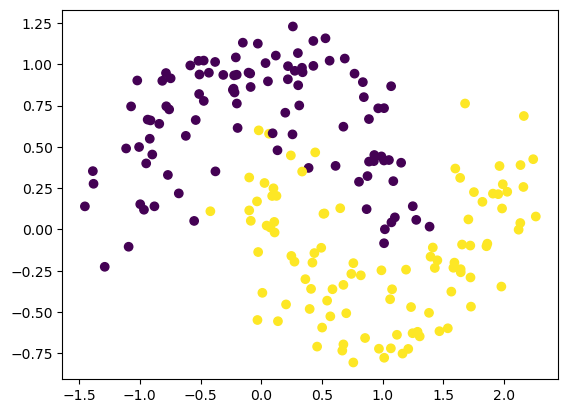

In [10]:
# Plot data
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [8]:
# Convert to torch tensors
x = torch.FloatTensor(x)
y = torch.LongTensor(y) # Normally want to convert labels to long

In [24]:
class Model(nn.Module):

    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(Model, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)
    
    def forward(self, x):
        out = self.hidden(x)
        out = nn.functional.relu(out)
        out = self.out(out)
        return out

In [25]:
network = Model(2, 50, 2)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02)

In [26]:
epochs = 10_000

plt.ion()
for epoch in range(epochs):
    # Forward Prop
    out = network(x)

    # Calculate Loss
    loss = loss_function(out, y)

    # Calculate Gradients
    optimizer.zero_grad
    loss.backward()

    # Update Weights
    optimizer.step()

    if epoch % 1000 == 0:
        # Show the learning process up until now
        max_value, prediction = torch.max(out, 1)
        output = prediction.data.numpy() # Convert to numpy
        labels = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c = labels)
        accuracy = (output == labels).mean()
        plt.text(3, -1, f"Accuracy = {accuracy:.2f}")
        plt.pause(0.1)

plt.ioff()
plt.show()

TypeError: 'builtin_function_or_method' object is not subscriptable